## Ludwig, 2020 Code to Caluclate Xray Luminosity for Binary Stripped Star - Neutron Star Source.  
## Calculation by Ylva Gotberg  
  
### Dependencies :  
https://pypi.org/project/tabula-py/
and latex (for plots)

In [1]:
import tabula
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import colors
import astropy.constants as const
import astropy.units as u

from matplotlib import rc
from matplotlib import cm

fsize = 30
rc("font", **{"family": "serif", "serif": ["Times"], "size": fsize})
rc("text", usetex=True)

In [2]:
# From Ylva's 2018 paper I grabbed Table B.2, this is for Z = 0.002, a quick google search showed an SMC Z of 0.004 so I thought this was appropriate.


file = "https://arxiv.org/pdf/1802.03018.pdf"
table = tabula.read_pdf(file, pages="23", multiple_tables=False, silent=True)

# Clean Up the Table, Store units in case I need it later.
df = table[0]
units = df.iloc[0]
df = df.drop([0])
df = df.drop(["Group"], axis=1)
df["Minit"] = (
    np.array([re.findall("\d+\.\d+", str) for str in df["Minit"]])
    .flatten()
    .astype(float)
)
df

,Minit,Pinit,Mstrip,"MH,tot",log10 L,log10 LH,T?,Teff,log10 geff,Reff,"XH,s","XHe,s",log10 Ṁwind,Γe,v∞,log10 Q0,log10 Q1,log10 Q2
1,2.00,3.4,0.39,0.004,0.9,-0.6,24.8,24.7,5.63,0.16,1.00,0.00,-12.0,0.001,1460,41.9,38.6,31.2
2,2.21,3.8,0.44,0.006,1.2,-0.3,26.8,26.7,5.57,0.18,1.00,0.00,-12.0,0.001,1450,42.4,39.7,33.6
3,2.44,4.1,0.5,0.007,1.4,-0.0,28.8,28.6,5.51,0.21,1.00,0.00,-12.0,0.002,1450,43.0,41.3,36.8
4,2.70,4.4,0.58,0.009,1.7,0.2,31.9,31.8,5.48,0.23,0.96,0.04,-12.0,0.002,1480,44.1,42.5,37.7
5,2.99,4.7,0.67,0.011,1.9,0.5,34.0,33.8,5.43,0.26,0.96,0.04,-12.0,0.004,1490,44.8,43.9,38.9
6,3.30,5.1,0.76,0.013,2.1,0.8,36.4,36.2,5.39,0.29,0.96,0.04,-12.0,0.005,1500,45.3,44.6,39.5
7,3.65,5.4,0.87,0.017,2.3,1.1,38.6,38.4,5.36,0.32,0.53,0.47,-12.0,0.006,1520,45.7,44.5,39.2
8,4.04,5.8,1.0,0.02,2.5,1.4,41.2,41.0,5.31,0.37,0.59,0.41,-11.3,0.008,1540,46.1,45.3,38.8
9,4.46,6.3,1.15,0.025,2.7,1.6,43.2,43.0,5.25,0.42,0.54,0.46,-10.6,0.011,1540,46.4,45.7,40.1
10,4.93,6.8,1.3,0.031,2.9,1.9,45.0,44.8,5.2,0.47,0.39,0.61,-9.9,0.013,1540,46.6,46.0,40.5


# $ L = \eta \epsilon \frac{G M_{ns}\dot{M}_{acc}}{R_{NS}}$  
  
# $ \dot{M}_{acc} = \frac{G^2 M_{NS}^2}{v_{relative}^3 a^2 v_{wind}} |\dot{M}_{wind}|$

# $ v_{wind}(r) = v_\infty (1 - \frac{R_{star}}{r})^\beta $

# $ v_{relative} = \sqrt{v_{wind}(r)^2 + v_{orbit}^2}$

## $\eta$ : 

In [3]:
eta_table = tabula.read_pdf(
    "http://www.tassosfragos.com/wp-content/uploads/2014/09/apj_764_1_41.pdf",
    pages="6",
    multiple_tables=False,
    silent=True,
)
eta_table[0]

,Unnamed: 0,Absorption Corrected,Absorption Uncorrected
0,NaN,High-Soft State Low-Hard State,High-Soft State Low-Hard State
1,Energy Band,NS BH NS BH,NS BH NS BH
2,0.3–2 keV,0.06 ± 0.09 0.28 ± 0.20 0.08 ± 0.06 0.13 ± 0.11,0.05 ± 0.08 0.09 ± 0.10 0.05 ± 0.03 0.08 ± 0.06
3,0.3–7 keV,0.61 ± 0.09 0.75 ± 0.18 0.29 ± 0.12 0.36 ± 0.13,0.57 ± 0.09 0.48 ± 0.14 0.25 ± 0.08 0.30 ± 0.08
4,0.3–8 keV,0.67 ± 0.09 0.78 ± 0.16 0.31 ± 0.12 0.39 ± 0.13,0.63 ± 0.09 0.51 ± 0.13 0.27 ± 0.09 0.33 ± 0.10
5,0.3–10 keV,0.77 ± 0.08 0.82 ± 0.13 0.36 ± 0.13 0.43 ± 0.13,0.73 ± 0.08 0.55 ± 0.12 0.32 ± 0.10 0.38 ± 0.10
6,0.5–2 keV,0.06 ± 0.09 0.26 ± 0.19 0.08 ± 0.06 0.12 ± 0.09,0.05 ± 0.08 0.09 ± 0.10 0.05 ± 0.03 0.07 ± 0.05
7,0.5–10 keV,0.77 ± 0.08 0.80 ± 0.11 0.36 ± 0.13 0.42 ± 0.13,0.73 ± 0.07 0.55 ± 0.12 0.32 ± 0.10 0.37 ± 0.10
8,2–10 keV,0.71 ± 0.08 0.54 ± 0.12 0.28 ± 0.09 0.30 ± 0.11,0.68 ± 0.07 0.46 ± 0.09 0.27 ± 0.08 0.30 ± 0.11


## $\epsilon$ : 

Per https://arxiv.org/pdf/1207.3113.pdf this varies between 0.01 and 0.1. Ish? Table 1 seems more complicated... I haven't carefully read this yet.

# For Period, V_orbit, assume Kepler's laws : 
## Note: For a tight orbit, assume circular geometry, a = r (distance between orbitting object and stripped star)   
## $ P^2 = \frac{4\pi^2}{G}\frac{a^3}{(M_1 + M_2)} $  
## $ P = \frac{2\pi}{v_{orbit}} $  
## $ v_{orbit} = \frac{2\pi}{P} $

In [7]:
units

Group               NaN
Minit              [M ]
Pinit            [days]
Mstrip             [M ]
MH,tot             [M ]
log10 L            [L ]
log10 LH           [L ]
T?                 [kK]
Teff               [kK]
log10 geff     [cm s−2]
Reff               [R ]
XH,s                NaN
XHe,s               NaN
log10 Ṁwind    [M yr−1]
Γe                  NaN
v∞             [km s−1]
log10 Q0          [s−1]
log10 Q1          [s−1]
log10 Q2          [s−1]
Name: 0, dtype: object

In [5]:
class xray:
    def __init__(
        self,
        M_stripped,
        R_stripped,
        period,
        v_inf,
        dM_wind,
        eta=0.67,
        epsilon=0.1,
        M_NS=1.4 * const.M_sun,
        R_NS=10 * u.km,
        beta=1,
        alpha=1.5,
        hydrogen_mass_fraction=0.02,
    ):

        G = const.G

        # Add units to quantities 
        self.period = period * u.day

        self.M_stripped = M_stripped * const.M_sun

        self.R_stripped = R_stripped * const.R_sun

        self.v_inf = v_inf * u.km / u.s

        # Calculate Eddington Luminosity
        self.kramers_opacity = 0.02 * (1 + hydrogen_mass_fraction) * u.cm ** 2 / u.g
        
        self.L_eddington = (4 * np.pi * const.c * G * M_NS / self.kramers_opacity).to(u.erg / u.s)
        
        # Calculate Uncorrected Luminosity
        self.dM_wind = np.abs(dM_wind) * const.M_sun / u.year

        self.distance = (
            self.period ** 2 * G * (self.M_stripped + M_NS) / (4 * np.pi ** 2)
        ) ** (1 / 3)

        self.omega_orbit = 2 * np.pi / self.period

        self.v_orbit = self.omega_orbit * self.distance

        self.v_wind = self.v_inf * (1 - self.R_stripped / self.distance) ** beta

        self.v_relative = np.sqrt(self.v_wind ** 2 + self.v_orbit ** 2)

        self.dM_acc = (alpha * G ** 2 * M_NS ** 2 * self.dM_wind) / (
            2 * self.v_relative ** 3 * self.distance ** 2 * self.v_wind
        )

        self.L_uncorrected = (G * M_NS * self.dM_acc / R_NS).to(u.erg / u.s)

        # Calculate correction Factors eta and epsilon. 
        
        if self.L_uncorrected > 0.1 * self.L_uncorrected : 
            
            self.epsilon = 1
            
        elif self.L_uncorrected < 0.1 * self.L_uncorrected : 
            
            self.epsilon = 0.1 # Check This
        
        if self.L_uncorrected > 0.05 * self.L_eddington :
            # High Soft State
            self.eta = 0.77
            
        elif self.L_uncorrected < 0.05 * self.L_eddington : 
            # Low Hard State
            self.eta = 0.36 
        
        self.L = self.L_uncorrected * self.epsilon * self.eta
        

In [18]:
def vary_period(period):
    m_stripped = []
    luminosity = []
    for n in range(df.shape[0]):
        X = xray(
            df["Mstrip"].iloc[n],
            df["Reff"].iloc[n],
            period,
            df["v∞"].iloc[n],
            10 ** df["log10 Ṁwind"].astype(float).iloc[n],
        )

        m_stripped.append(df["Mstrip"].astype(float).iloc[n])
        luminosity.append(np.log10(X.L.value))

    return m_stripped, luminosity


periods = [1 / 24, 2.5 / 24, 6 / 24, 12 / 24, 1, 2, 5, 10]


/home/bethany/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


/home/bethany/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


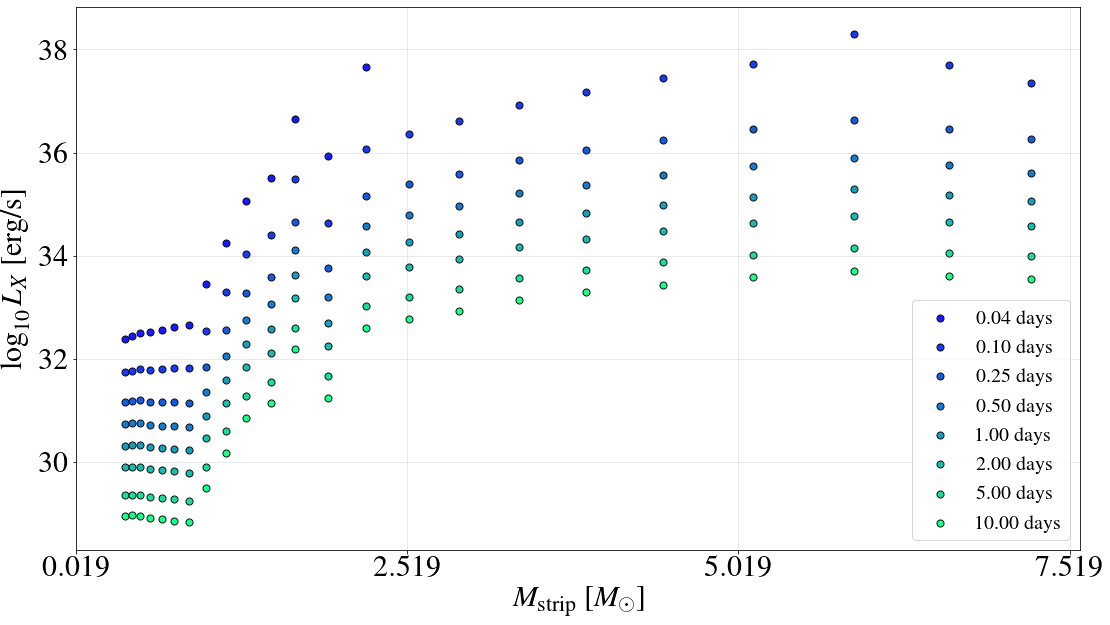

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))


for i, period in enumerate(periods):
    
    color = colors.rgb2hex(cmap(i)[:3])

    m, l = vary_period(period)
   
    ax.scatter(
        m, l, s=50, alpha=0.9, label=f"{period:0.2f} days", c=color, edgecolor="black"
    )
    
cmap = cm.get_cmap("winter", len(periods))

ax.set_xlabel("$M_{\\mathrm{strip}}$ [$M_{\\odot}$]")
ax.set_ylabel("$\\log_{10} L_X$ [erg/s]")
start, end = ax.get_xlim()
stepsize = 2.5
ax.xaxis.set_ticks(np.arange(start, end, stepsize))
ax.grid(c="gray", alpha=0.2)
ax.legend(fontsize=20)

plt.savefig("period.png")